In [ ]:
!pip install -U statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 8.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

<ipython-input-2-8ccf45899a6d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# 2017 Aug to 2022 August Google Stock Price data

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.8 MB/s 


In [ ]:
import pmdarima as pm

In [ ]:
df=pd.read_csv('GOOG.csv',index_col='Date',parse_dates=True)

Checking if the time series is stationary or non-stationary using ACF, PACF and adfuller test

In [ ]:
def adf(x):
  res=adfuller(x)
  print("test-stat",res[0])
  print("p-val",res[1])
  if(res[1]<0.05):
    print("stationary")
  else:
    print("non-stationary")

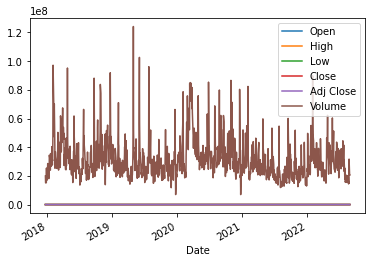

In [ ]:
df.plot()

In [ ]:
def log_ret(price):
  log_price=np.log(price)
  return log_price

In [ ]:
df['Logret']=log_ret(df['Close'])
df['diff']=df['Close'].diff()

In [ ]:
adf(df['Close'])

test-stat -0.8397117232869024
p-val 0.8071779117674198
non-stationary


In [ ]:
adf(df['Logret'].dropna())

test-stat -0.8715531193315369
p-val 0.7971960044985817
non-stationary


In [ ]:
adf(df['diff'].dropna())

test-stat -11.728802852406437
p-val 1.3572214516256217e-21
stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


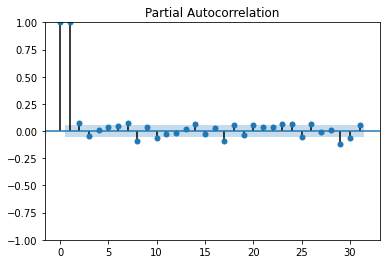

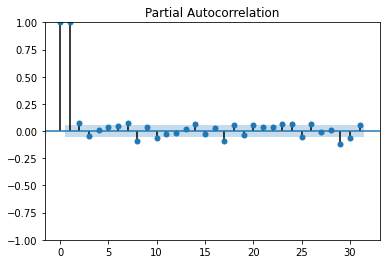

In [ ]:
plot_pacf(df['Close'].dropna())

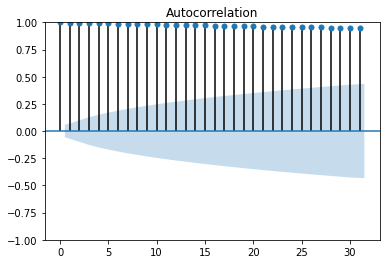

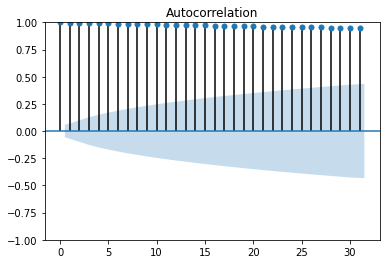

In [ ]:
plot_acf(df['Close'].dropna())

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


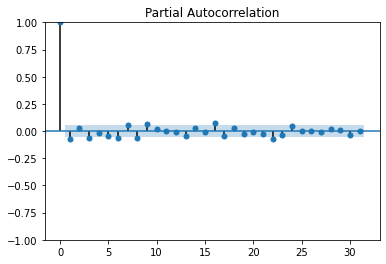

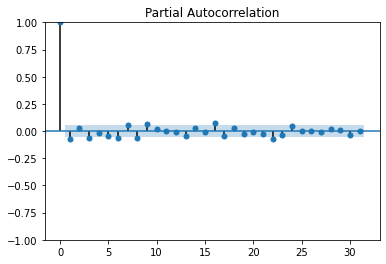

In [ ]:
plot_pacf(df['diff'].dropna())

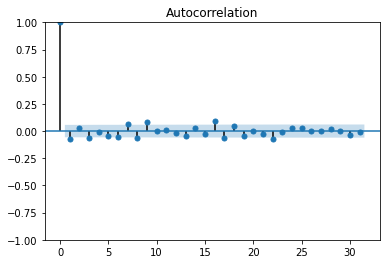

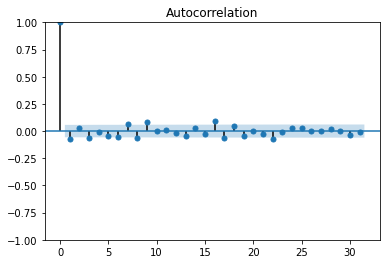

In [ ]:
plot_acf(df['diff'].dropna())

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


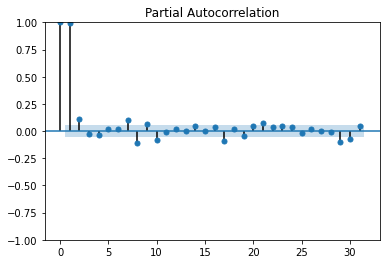

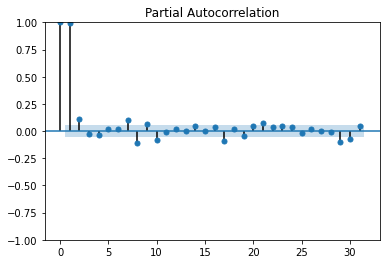

In [ ]:
# p value
plot_pacf(df['Logret'].dropna())

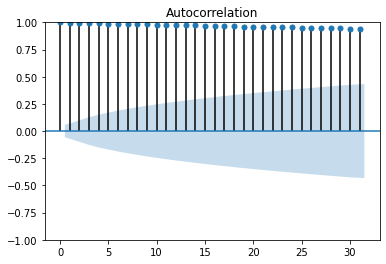

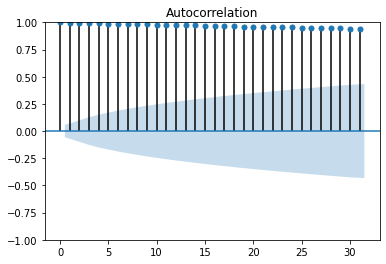

In [ ]:
# q value
plot_acf(df['Logret'].dropna())

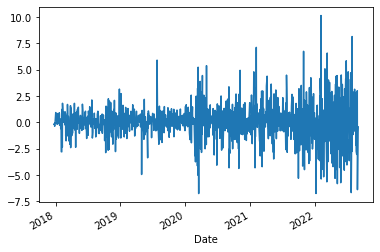

In [ ]:
df['diff'].plot()

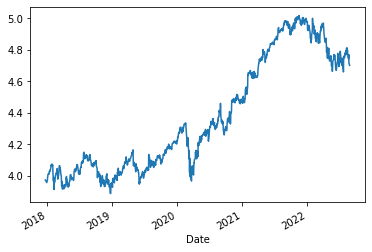

In [ ]:
df['Logret'].plot()

The above graphs,adfuller test suggest p,d in ARIMA as 1,1

Using AUTO ARIMA

In [ ]:
Ntest=30
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:

model=pm.auto_arima(train['Logret'],error_action='ignore',trace=True,supress_warnings=True,stepwise=False,
                    max_p=15,max_q=10,max_order=25,
                    seasonal=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1150
Model:               SARIMAX(9, 1, 0)   Log Likelihood                2949.507
Date:                Fri, 23 Dec 2022   AIC                          -5877.015
Time:                        06:29:13   BIC                          -5821.501
Sample:                             0   HQIC                         -5856.058
                               - 1150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.001      1.336      0.181      -0.000       0.002
ar.L1         -0.0955      0.025     -3.896      0.000      -0.144      -0.047
ar.L2         -0.0125      0.023     -0.537      0.591      -0.058       0.033
ar.L3          0.0084      0.024      0.344      0.731      -0.039       0.056
ar.L4         -0.0198      0.027     -0.742      0.458      -0.072       0.032
ar.L5         -0.0359      0.024     -1.498      0.134      -0.083       0.011
ar.L6         -0.0951      0.024     -3.923      0.000      -0.143      -0.048
ar.L7          0.0973      0.028      3.438      0.001       0.042       0.153
ar.L8         -0.0852      0.027     -3.116      0.002      -0.139      -0.032
ar.L9          0.0903      0.028      3.209      0.001       0.035       0.146
sigma2         0.0003   9.77e-06     35.301      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               496.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.28
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
def plot_result(model,fulldata,train,test):
  params=model.get_params()
  d=params['order'][1]
  train_pred=model.predict_in_sample(start=d,end=-1)
  test_pred,conf_int=model.predict(n_periods=Ntest,return_conf_int=True)
  fig,ax=plt.subplots()
  ax.plot(fulldata.index,fulldata['Logret'],label='actual')
  ax.plot(train.index[d:],train_pred,label='train')
  ax.plot(test.index,test_pred,label='test')
  ax.legend()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


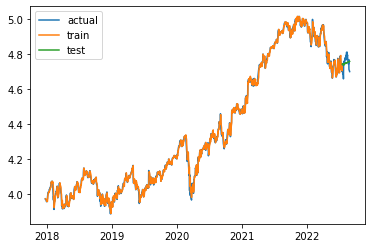

In [ ]:
plot_result(model,df,train,test)

In [ ]:
def rmse(y,t):
  return np.sqrt(np.mean(t-y)**2)

In [ ]:
# rmse(test_pred,test)
y_true = test['Logret'].values
rmse = np.sqrt(mean_squared_error(y_true,test_pred))
print(rmse)
# mae = mean_absolute_error(y_true,test_pred)

0.0384334397838551
